In [2]:
!pip install ultralytics --no-deps

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 6.5 MB/s  0:00:00


In [3]:
!pip install torch torchvision numpy matplotlib polars pyyaml pillow psutil requests scipy ultralytics-thop
!pip install opencv-python-headless

  Using cached polars-1.34.0-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.17-py3-none-any.whl.metadata (14 kB)
  Using cached polars_runtime_32-1.34.0-cp39-abi3-win_amd64.whl.metadata (1.5 kB)
Using cached polars-1.34.0-py3-none-any.whl (772 kB)
Using cached polars_runtime_32-1.34.0-cp39-abi3-win_amd64.whl (40.1 MB)
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.7 MB 8.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.7 MB 6.9 MB/s eta 0:00:06
   ---- ----------------------------------- 3.9/38.7 MB 6.5 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/38.7 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.8/38.7 MB 5.7 MB/s eta 0:00:06
   ------ --------------------------------- 6.3/38.7 MB 5.3 MB/s eta 0:00:07
   ------- -------------------------------- 6.8/38.7 MB 4.9 MB/s eta 0:00:07
   ------- -------------------------------- 7.6/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
label-studio 1.20.0 requires numpy<2.0.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np

In [5]:
model = YOLO('yolo11s.pt')

In [3]:
#Creating own custom dataset from scratch
import os
import time
import uuid

path_images = 'images'
labels = ['happy','neutral','sad']
num_images = 25

url = 0
capture = cv2.VideoCapture(url)

for label in labels:
    print(f'Creating dataset for {label}')
    #time.sleep(6)
    for num in range(num_images):
        print(num)
       
        ret,frame = capture.read()
        print(ret)
        if not ret:
            break
        cv2.imshow('Live video', frame)
        img_name = os.path.join(path_images,label + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(img_name, frame)
        time.sleep(3)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

capture.release()
cv2.destroyAllWindows()

Creating dataset for happy
0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
Creating dataset for neutral
0
True
1
True
2
True
Creating dataset for sad
0
True


In [6]:
import torch
torch.cuda.is_available()

True

In [7]:
# Train the model on custom dataset
results = model.train(data="dataset.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.213  Python-3.11.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)


C:\Users\Sahran Khuwaja\anaconda3\envs\ml\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, 

In [3]:
#Loading our trained model
model = YOLO("trained model/model.pt")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
prediction_sad = model.predict(source="test/sad1.jpg")


image 1/1 C:\Users\Sahran Khuwaja\Documents\Machine Learning Projects\Emotion Detection for github\test\sad1.jpg: 512x640 1 sad, 95.5ms
Speed: 3.9ms preprocess, 95.5ms inference, 67.6ms postprocess per image at shape (1, 3, 512, 640)


In [6]:
prediction_neutral = model.predict(source="test/neutral1.jpg")


image 1/1 C:\Users\Sahran Khuwaja\Documents\Machine Learning Projects\Emotion Detection for github\test\neutral1.jpg: 448x640 1 neutral, 55.3ms
Speed: 2.1ms preprocess, 55.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


In [7]:
prediction_happy = model.predict(source="test/happy1.jpg")


image 1/1 C:\Users\Sahran Khuwaja\Documents\Machine Learning Projects\Emotion Detection for github\test\happy1.jpg: 384x640 1 happy, 2 sads, 61.1ms
Speed: 1.3ms preprocess, 61.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


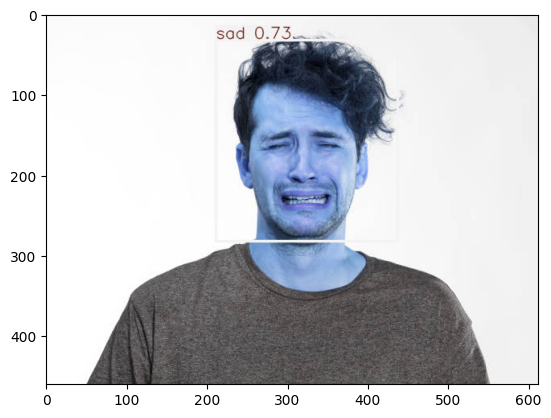

In [8]:
plt.imshow(prediction_sad[0].plot())
plt.show()

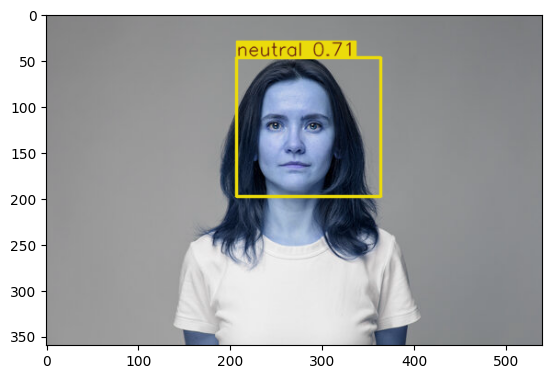

In [9]:
plt.imshow(prediction_neutral[0].plot())
plt.show()

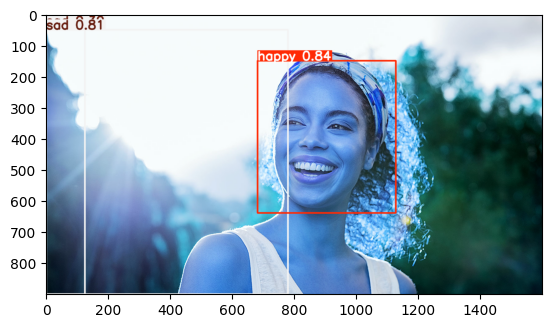

In [10]:
plt.imshow(prediction_happy[0].plot())
plt.show()

In [ ]:
# Detection using webcam
capture = cv2.VideoCapture(0)
while capture.isOpened():
    ret,frame = capture.read()
    output = model.predict(frame)
    cv2.imshow('Detection', output[0].plot())
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()